In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
path = '/home/zane/Documents/code/research/uw2020/masuite/tmp/masuite'
vals = []
for file in os.listdir(path):
    filename = os.fsdecode(file)
    if not filename.endswith('.csv'):
        continue
    df = pd.read_csv(f'{path}/{filename}')
    mean_ret = df['agent0_avg_rets'].values.mean()
    vals.append((filename, mean_ret))
vals.sort(key=lambda x: x[1], reverse=True)


cartpole_simplepg-0_epochs30_batch_size5000_lr0.01_.csv
cartpole_simplepg-0_epochs50_batch_size2000_lr0.01_.csv
cartpole_simplepg-0_epochs40_batch_size7000_lr0.01_.csv
cartpole_simplepg-0_epochs70_batch_size2000_lr0.01_.csv
cartpole_simplepg-0_epochs50_batch_size6000_lr0.01_.csv


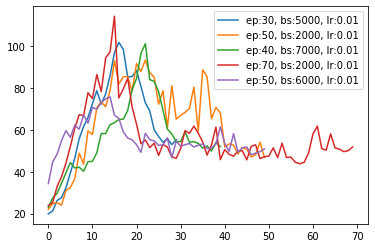

In [4]:
'''========== BEST RETURNS =========='''
for val in vals[:5]:
    print(val[0])
    params = re.findall('\d+', val[0])
    epochs = params[1]
    batch_size = params[2]
    lr = float(f'{params[3]}.{params[4]}')
    label = f'ep:{epochs}, bs:{batch_size}, lr:{lr}'
    df = pd.read_csv(f'{path}/{val[0]}')
    plt.plot(df['agent0_avg_rets'], label=label)
plt.legend()

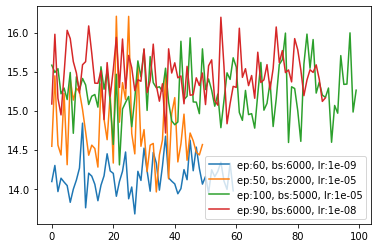

In [5]:
'''========== WORST RETURNS =========='''
for val in vals[:-5:-1]:
    params = re.findall('\d+', val[0])
    epochs = params[1]
    batch_size = params[2]
    lr = float(f'1e-{params[-1]}')
    label = f'ep:{epochs}, bs:{batch_size}, lr:{lr}'
    df = pd.read_csv(f'{path}/{val[0]}')
    plt.plot(df['agent0_avg_rets'], label=label)
plt.legend()